In [1]:
import numpy as np
import pandas as pd

In [2]:
mask = pd.read_csv('/Users/architverma/Documents/manifold-alignment-paper/gilad-data/gse118723/GSE118723_quality-single-cells.txt.gz', delimiter = '\t', header = None, names = ['Cell','Mask']),

In [3]:
counts = pd.read_csv('/Users/architverma/Documents/manifold-alignment-paper/gilad-data/gse118723/GSE118723_scqtl-counts.txt.gz', delimiter = '\t')

In [4]:
meta_data = pd.read_csv('/Users/architverma/Documents/manifold-alignment-paper/gilad-data/gse118723/GSE118723_scqtl-annotation.txt.gz', delimiter = '\t')

In [5]:
counts.shape

(20151, 7585)

In [6]:
mm = mask[0]['Mask'].values

In [7]:
counts_mat = np.array(counts.values[:,1:]).astype(np.int)

In [8]:
counts_mat_post = counts_mat[:,mm]
print(counts_mat_post.shape)

(20151, 5597)


In [9]:
ids = list(counts)[1:]

In [10]:
ids_clip = [ids[i][0:7] for i in range(len(ids))]
ids_array = (np.array(ids_clip)[mm])
print(len(np.unique(ids_array)))

54


In [11]:
meta_data.head()

,experiment,well,batch,cell_number,concentration,tra1.60,individual.1,individual.2,individual.3,individual.4,...,detect_hs,chip_id,chipmix,freemix,snps,reads,avg_dp,min_dp,snps_w_min,valid_id
0,2192018,A01,b6,1,0.777191,True,NA18517,NA18913,NA19193,NA19210,...,5124,NA18517,0.70757,0.26189,311848,2448,0.01,1,1402,True
1,2192018,A02,b6,1,0.372280,True,NA18517,NA18913,NA19193,NA19210,...,3514,NA18913,0.52503,0.18181,311848,1331,0.00,1,829,True
2,2192018,A03,b6,1,1.429865,True,NA18517,NA18913,NA19193,NA19210,...,6743,NA19210,0.45602,0.15698,311848,5360,0.02,1,2262,True
3,2192018,A04,b6,1,1.990741,True,NA18517,NA18913,NA19193,NA19210,...,7933,NA18913,0.47715,0.17373,311848,7104,0.02,1,3019,True
4,2192018,A05,b6,1,2.545412,True,NA18517,NA18913,NA19193,NA19210,...,8767,NA19193,0.36809,0.15042,311848,9445,0.03,1,3881,True


In [12]:
meta1000 = pd.read_csv('1000genomes_meta.csv')

In [13]:
#meta1000

In [14]:
dat_ids = [np.char.split(ids,sep = '.')[i][0] for i in range(len(ids))]

In [15]:
dat_meta_map = [meta1000[meta1000['Catalog ID'] == dat_ids[i]].index[0] for i in range(len(ids))]

In [16]:
dat_genders = meta1000['Gender'][dat_meta_map]

In [17]:
import h5py

In [18]:
#fit = h5py.File('./rand-500-fullM/model-output-final.hdf5')
fit = h5py.File('./gilad-pca-matern-q10-noz-log2/model-output-final.hdf5')

In [19]:
fit2 = h5py.File('./gender-results/only_gender-pca-actually-1000-fullM/model-output-final.hdf5')

In [20]:
fit3 = h5py.File('./gender-results/only_gender-rand-1000-fullM/model-output-final.hdf5')

In [21]:
import matplotlib.pyplot as plt

In [22]:
plt.style.use('seaborn-poster')

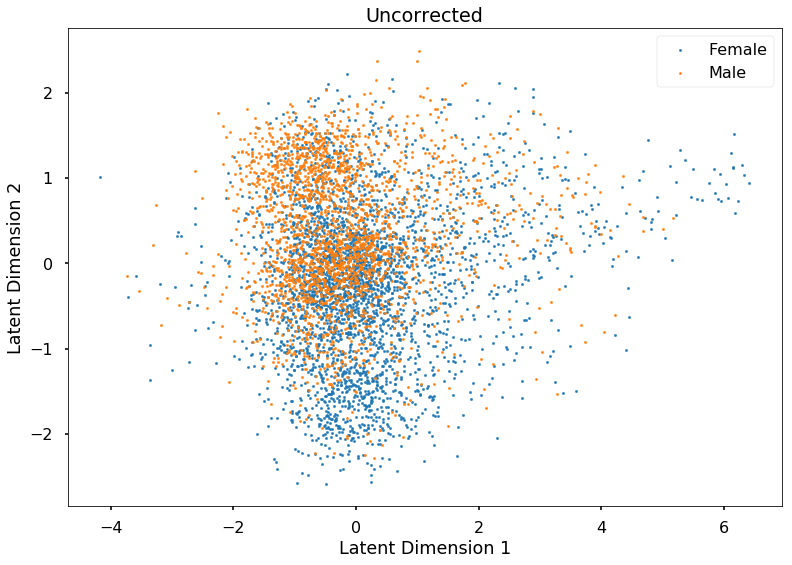

In [40]:
for i in dat_genders.unique():
    mask = dat_genders == i
    mask = mask[mm]
    mask = np.array(mask.values, dtype = bool)
    plt.scatter(fit['x_mean'][mask,1], fit['x_mean'][mask,2], s = 5.0, label = i)
plt.legend()
plt.xlabel('Latent Dimension 1')
plt.ylabel('Latent Dimension 2')
plt.title('Uncorrected')
plt.show()

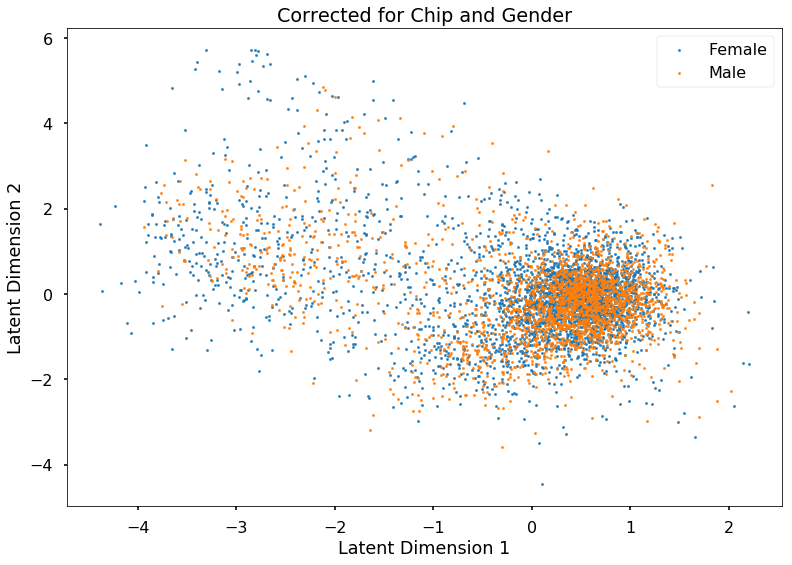

In [24]:
for i in dat_genders.unique():
    mask = dat_genders == i
    mask = mask[mm]
    mask = np.array(mask.values, dtype = bool)
    plt.scatter(fit2['x_mean'][mask,1], fit2['x_mean'][mask,2], s = 5.0, label = i)
plt.legend()
plt.title('Corrected for Chip and Gender')
plt.xlabel('Latent Dimension 1')
plt.ylabel('Latent Dimension 2')
plt.show()

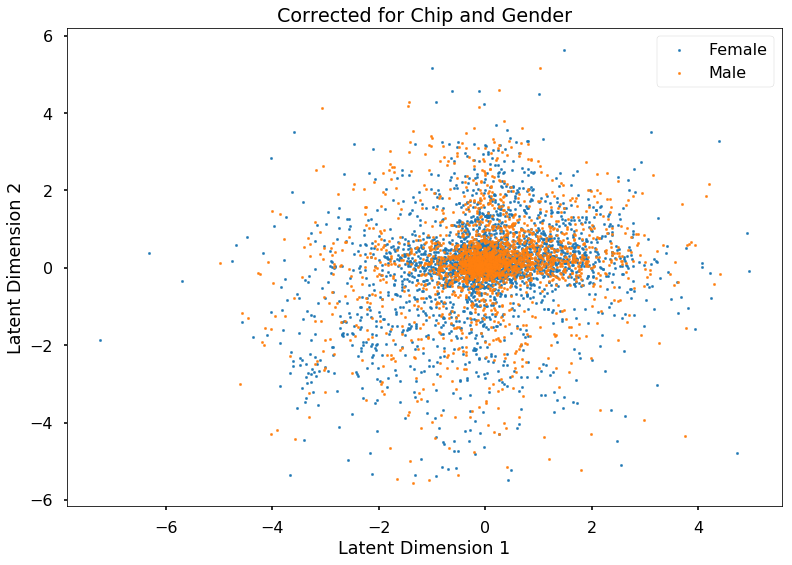

In [25]:
for i in dat_genders.unique():
    mask = dat_genders == i
    mask = mask[mm]
    mask = np.array(mask.values, dtype = bool)
    plt.scatter(fit3['x_mean'][mask,1], fit3['x_mean'][mask,2], s = 5.0, label = i)
plt.legend()
plt.title('Corrected for Chip and Gender')
plt.xlabel('Latent Dimension 1')
plt.ylabel('Latent Dimension 2')
plt.show()

In [26]:
from sklearn import metrics

In [27]:
# for j in range(0,10):
#     for k in range(j,10):
#         for i in dat_genders.unique():
#             mask = dat_genders == i
#             mask = mask[mm]
#             mask = np.array(mask.values, dtype = bool)
#             plt.scatter(fit['x_mean'][mask,j], fit['x_mean'][mask,k], s = 3.0, label = i)
#         plt.legend()
#         plt.show()

In [28]:
from sklearn.linear_model import LogisticRegression

In [29]:
y = np.array(dat_genders == 'Male')

In [30]:
lr_counts = LogisticRegression()
lr_counts.fit(counts_mat[:,mm].T, y[mm])
lr_counts.score(counts_mat[:,mm].T, y[mm])
predicted = lr_counts.predict_proba(counts_mat[:,mm].T)
metrics.roc_auc_score(y[mm], predicted[:,1])

/Users/architverma/anaconda/lib/python2.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


1.0

In [31]:
lr_fit = LogisticRegression()
lr_fit.fit(fit['x_mean'], y[mm])
lr_fit.score(fit['x_mean'], y[mm])
predicted = lr_fit.predict_proba(fit['x_mean'])
metrics.roc_auc_score(y[mm], predicted[:,1])

0.7342623352127308

In [32]:
lr_fit = LogisticRegression()
lr_fit.fit(fit['x_mean'][:,[0,7,8]], y[mm])
lr_fit.score(fit['x_mean'][:,[0,7,8]], y[mm])
predicted = lr_fit.predict_proba(fit['x_mean'][:,[0,7,8]])
metrics.roc_auc_score(y[mm], predicted[:,1])

0.5307296905558843

In [33]:
lr_fit2 = LogisticRegression()
lr_fit2.fit(fit2['x_mean'], y[mm])
lr_fit2.score(fit2['x_mean'], y[mm])
predicted = lr_fit2.predict_proba(fit['x_mean'])
metrics.roc_auc_score(y[mm], predicted[:,1])

0.42653376455382225

In [34]:
lr_fit2 = LogisticRegression()
lr_fit2.fit(fit3['x_mean'], y[mm])
lr_fit2.score(fit3['x_mean'], y[mm])
predicted = lr_fit2.predict_proba(fit['x_mean'])
metrics.roc_auc_score(y[mm], predicted[:,1])

0.5450282537296335

In [35]:
dims = np.sort([8, 7, 0])
lr_fit2 = LogisticRegression()
lr_fit2.fit(fit2['x_mean'][:,dims], y[mm])
lr_fit2.score(fit2['x_mean'][:,dims], y[mm])
predicted = lr_fit2.predict_proba(fit['x_mean'][:,dims])
metrics.roc_auc_score(y[mm], predicted[:,1])

0.4975588233601826

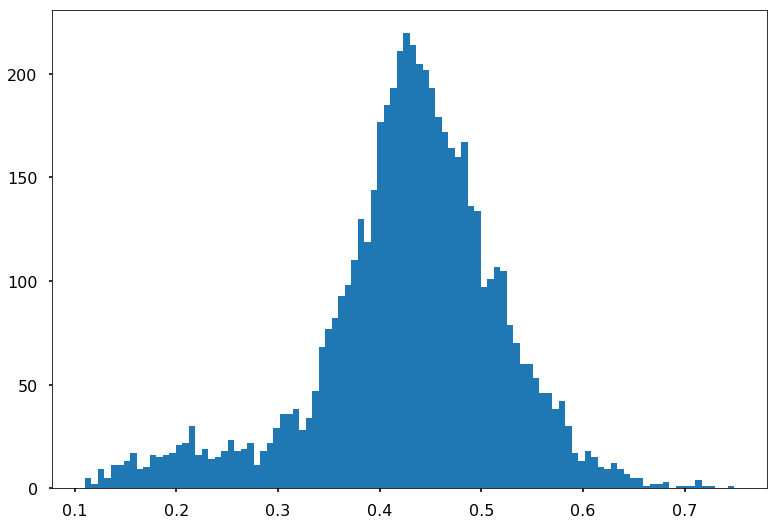

In [36]:
plt.hist(predicted[:,1], bins = 100)
plt.show()

In [37]:
cmales = counts_mat_post.T[predicted[:,1] > 0.55]

In [38]:
cfemale = counts_mat_post.T[predicted[:,1] < 0.30]

In [39]:
gender_diff = ttest_ind(cmales, cfemale, equal_var = False)

NameError: name 'ttest_ind' is not defined

In [ ]:
np.sum(gender_diff[1] < 1e-9)

In [ ]:
for i in np.where(gender_diff[1] < 1e-9)[0]:
    print(genes[i]['symbol'])
    print(gender_diff[0][i])

In [ ]:
not_clear = counts_mat_post.T[predicted[:,1] < 0.55]
gender_diff = ttest_ind(cmales, not_clear, equal_var = False)

In [ ]:
for i in np.where(gender_diff[1] < 1e-200)[0]:
    print(genes[i]['symbol'])
    print(gender_diff[0][i])

In [ ]:
plt.scatter(fit2['x_mean'][:,0], fit2['x_mean'][:,7], s = 5.0, c = predicted[:,0])
plt.colorbar()
plt.show()

In [ ]:
for i in dat_genders.unique():
    mask = dat_genders == i
    mask = mask[mm]
    mask = np.array(mask.values, dtype = bool)
    plt.scatter(fit2['x_mean'][mask,0], fit2['x_mean'][mask,7], s = 5.0, label = i)
plt.legend()
plt.show()

In [ ]:
np.argsort(np.sum(fit3['lengthscales'][0:10,0:2], axis = 1))

In [ ]:
np.argsort(np.sum(fit2['lengthscales'][0:10,0:2], axis = 1))

In [ ]:
np.argsort(np.sum(fit['lengthscales'][0:10,0:2], axis = 1))

In [ ]:
# plt.style.use('seaborn-poster')
# for j in range(0,10):
#     for k in range(j,10):
#         for i in dat_genders.unique():
#             mask = dat_genders == i
#             mask = mask[mm]
#             mask = np.array(mask.values, dtype = bool)
#             plt.subplot(121)
#             plt.scatter(fit['x_mean'][mask,j], fit['x_mean'][mask,k], s = 3.0, label = i)
#             plt.subplot(122)
#             plt.scatter(fit2['x_mean'][mask,j], fit2['x_mean'][mask,k], s = 3.0, label = i)
#         plt.legend()
#         plt.show()

In [ ]:
# plt.style.use('seaborn-poster')
# j = 0
# k = 8
# for i in dat_genders.unique():
#     mask = dat_genders == i
#     mask = mask[mm]
#     mask = np.array(mask.values, dtype = bool)
#     plt.subplot(121)
#     plt.scatter(fit['x_mean'][mask,j], fit['x_mean'][mask,k], s = 3.0, label = i)
#     plt.subplot(122)
#     plt.scatter(fit2['x_mean'][mask,j], fit2['x_mean'][mask,k], s = 3.0, label = i)
# plt.legend()
# plt.show()

In [ ]:
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression

In [ ]:
process = h5py.File('gilad_processed.hdf5','r')
z = np.hstack((process['z_c1'],np.expand_dims(y[mm],axis = 1)))

In [ ]:
ols = LinearRegression()

In [ ]:
ols.fit(z, counts_mat_post.T)

In [ ]:
yres = counts_mat_post.T - ols.predict(z)

In [ ]:
pca = PCA(n_components = 10)
zres = pca.fit_transform(yres)

In [ ]:
np.sum(pca.explained_variance_ratio_)

In [ ]:
lr_yres = LogisticRegression()
lr_yres.fit(zres, y[mm])
lr_yres.score(zres, y[mm])
predicted = lr_yres.predict_proba(zres)
metrics.roc_auc_score(y[mm], predicted[:,1])

In [ ]:
pca = PCA(n_components = 200)
zres = pca.fit_transform(yres)
print(np.sum(pca.explained_variance_ratio_))
lr_yres = LogisticRegression()
lr_yres.fit(zres, y[mm])
lr_yres.score(zres, y[mm])
predicted = lr_yres.predict_proba(zres)
metrics.roc_auc_score(y[mm], predicted[:,1])

In [ ]:
pca = PCA(n_components = 1000)
zres = pca.fit_transform(yres)
print(np.sum(pca.explained_variance_ratio_))
lr_yres = LogisticRegression()
lr_yres.fit(zres, y[mm])
lr_yres.score(zres, y[mm])
predicted = lr_yres.predict_proba(zres)
metrics.roc_auc_score(y[mm], predicted[:,1])

In [ ]:
import GPy
from IPython.display import display

In [ ]:
kernel = GPy.kern.RBF(input_dim=z.shape[1])

In [ ]:
# m = GPy.models.GPRegression(z,counts_mat_post.T,kernel)
# m.optimize()

In [ ]:
# corrected_zero = m.predict(z)

In [ ]:
# gpres = counts_mat_post.T - corrected_zero[0]

In [ ]:
# gpres.shape

In [ ]:
# pca = PCA(n_components = 1000)
# zres = pca.fit_transform(gpres)
# # np.sum(pca.explained_variance_ratio_)

In [ ]:
# lr_gpres = LogisticRegression()
# lr_gpres.fit(zres, y[mm])
# lr_gpres.score(zres, y[mm])

Marker Genes

In [ ]:
# https://www.abcam.com/primary-antibodies/b-cells-basic-immunophenotyping

In [ ]:
import mygene

In [ ]:
gene_var = np.var(counts_mat_post, axis = 1)

In [ ]:
gene_mean = np.mean(counts_mat_post, axis = 1)

In [ ]:
argsort_var = np.argsort(gene_var)

In [ ]:
argsort_mean = np.argsort(gene_mean)

In [ ]:
mg = mygene.MyGeneInfo()

In [ ]:
genes = mg.querymany(counts['gene'].values, scopes = 'ensembl.gene', fields = 'symbol', species = 'human')

In [ ]:
from scipy.stats import variation

In [ ]:
genes_cv = variation(counts_mat_post, axis = 1)

In [ ]:
argsort_cv = np.argsort(genes_cv)

In [ ]:
argsort_is_nan = True
lastix = 1;
while argsort_is_nan:
    argsort_is_nan = np.isnan(genes_cv[argsort_cv[-lastix]])
    lastix += 1

In [ ]:
mask = np.zeros(len(genes))
for i in range(len(genes)):
    try:
        mask[i] = 'CD' in genes[i]['symbol']
    except:
        mask[i] = False

In [ ]:
#for i in np.where(mask)[0]:
#    print(str(i) + ': ' + genes[i]['symbol'])

In [ ]:
markers = ['CD19', 'CD27', 'CD38', 'CD40', 'CD80', 'CD1D', 'CD1A', 'CD1C', 'CD1B', 'CD1E', 'CD22', 'CD5L']
ixs = [14077, 7739, 49, 2419, 10158, 10159, 10161, 10163, 10165, 312, 1240]
celltype = ['Activated B Cell', 'Plasma Cell', 'Plasma Cell', 'Memory Cell', 'Memory Cell', 
            'Marginal zone B cells', 'Marginal zone B cells', 'Marginal zone B cells', 'Marginal zone B cells', 'Marginal zone B cells',
           'Follicular B Cells', 'Regulatory B Cells']

In [ ]:
import umap

In [ ]:
reducer = umap.UMAP()

In [ ]:
embedding = reducer.fit_transform(fit['x_mean'])

In [ ]:
for i in dat_genders.unique():
    mask = dat_genders == i
    mask = mask[mm]
    mask = np.array(mask.values, dtype = bool)
    plt.scatter(embedding[mask,0], embedding[mask,1], s = 5.0, label = i)
plt.legend()
plt.show()

In [ ]:
embedding2 = reducer.fit_transform(fit2['x_mean'])

In [ ]:
for i in dat_genders.unique():
    mask = dat_genders == i
    mask = mask[mm]
    mask = np.array(mask.values, dtype = bool)
    plt.scatter(embedding2[mask,0], embedding2[mask,1], s = 5.0, label = i)
plt.legend()
plt.show()

In [ ]:
embedding3 = reducer.fit_transform(fit3['x_mean'])

In [ ]:
plt.style.use('seaborn-poster')
for i in range(len(ixs)):
    plt.scatter(embedding2[:,0], embedding2[:, 1], c = counts_mat_post[i,:], cmap = 'Reds', s= 5.0)
    plt.title(markers[i])
    plt.colorbar()
    plt.show()

In [ ]:
plt.style.use('seaborn-poster')
for i in range(len(ixs)):
    plt.scatter(embedding3[:,0], embedding3[:, 1], c = counts_mat_post[i,:], cmap = 'Reds', s= 5.0)
    plt.title(markers[i])
    plt.colorbar()
    plt.show()

In [ ]:
for i in range(1,6):
    plt.scatter(embedding2[:,0], embedding2[:, 1], c = counts_mat_post[argsort_var[-i],:], cmap = 'Reds', s= 5.0)
    plt.title(genes[argsort_var[-i]]['symbol'])
    plt.colorbar()
    plt.show()

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
kmeans = KMeans(n_clusters = 2)

In [ ]:
c2 = kmeans.fit_predict(fit2['x_mean'])

In [ ]:
for i in range(np.max(c2) + 1):
    mask = c2 == i
    plt.scatter(embedding3[mask,0], embedding3[mask, 1], s= 5.0)
plt.show()

In [ ]:
mask1 = c2 == 1

In [ ]:
counts1 = counts_mat_post[:, mask1]
counts0 = counts_mat_post[:, np.logical_not(mask1)]

In [ ]:
diff = np.mean(counts0, axis = 1) - np.mean(counts1, axis = 1)

In [ ]:
sort_diff = np.argsort(np.abs(diff))

In [ ]:
for i in np.where(np.abs(diff) > 100)[0]:
    plt.scatter(embedding2[:,0], embedding2[:, 1], c = counts_mat_post[i,:], cmap = 'Reds', s= 5.0)
    plt.title(genes[i]['symbol'])
    plt.colorbar()
    plt.show()

In [ ]:
for i in range(1,11):
    cix = argsort_cv[-(lastix + i)]
    plt.scatter(embedding2[:,0], embedding2[:, 1], c = counts_mat_post[cix,:], cmap = 'Reds', s= 5.0)
    plt.title(genes[cix]['symbol'])
    plt.colorbar()
    plt.show()

In [ ]:
genes_cv[argsort_cv[-448]]

In [ ]:
genes[argsort_cv[-448]]['symbol']

In [ ]:
plt.scatter(gene_mean, np.sqrt(gene_var), s = 5.0)
plt.show()

In [ ]:
counts[counts['gene'] == 'ENSG00000229807']

In [ ]:
for i in range(len(genes)):
    try:
        found = genes[i]['symbol'] == 'RPS4Y1'
        if found:
            print(i)
    except:
        found = False

In [ ]:
cix = 6141
plt.scatter(embedding2[:,0], embedding2[:, 1], c = counts_mat_post[cix,:], cmap = 'Reds', s= 5.0)
plt.title(genes[cix]['symbol'])
plt.colorbar()
plt.show()

In [ ]:
cix = ixs[0]
c = np.log2(1 + counts_mat_post[cix,:])
for j in range(0,10):
    for k in range(j,10):
        plt.subplot(131)
        plt.scatter(fit['x_mean'][:,j], fit['x_mean'][:,k], c = c, cmap = 'Reds', s = 5.0)
        plt.subplot(132)
        plt.scatter(fit2['x_mean'][:,j], fit2['x_mean'][:,k], c = c, cmap = 'Reds', s = 5.0)
        plt.subplot(133)
        plt.scatter(fit3['x_mean'][:,j], fit3['x_mean'][:,k], c = c, cmap = 'Reds', s = 5.0)
        plt.colorbar()
        plt.show()

In [ ]:
from scipy.stats import spearmanr

In [ ]:
spearmans = spearmanr(fit['x_mean'][:,[7,8]], counts_mat_post.T)

In [ ]:
sub = spearmans[0][0:2,2:]
test = np.argsort(sub[0,:])
counter = 0
ix = 1
while counter < 5:
    if np.isnan(sub[0,test[-ix]]):
        pass
    else:
        print(genes[test[-ix]]['symbol'])
        print(test[-ix])
        counter += 1
    ix += 1

In [ ]:
test = np.argsort(sub[1,:])
counter = 0
ix = 1
while counter < 5:
    if np.isnan(sub[0,test[-ix]]):
        pass
    else:
        print(genes[test[-ix]]['symbol'])
        print(test[-ix])
        counter += 1
    ix += 1

In [ ]:
np.argsort(sub[0,])

In [ ]:
test[-1]

In [ ]:
ix

In [ ]:
## posterior gene expression, compare manifold of genes in male vs female posterior

In [ ]:
from sklearn.gaussian_process.kernels import Matern, RBF

In [ ]:
def kernel(x1,x2, dims, z):
    m12 = Matern(length_scale = z['lengthscales'][dims,1], nu = 0.5)
    rbf = RBF(length_scale = z['lengthscales'][dims,0])
    
    m12eval = m12(x1[:,dims],x2[:,dims])
    rbfeval = rbf(x1[:,dims],x2[:,dims])
    
    total = z['variances'][0]*np.array(rbfeval) + z['variances'][1]*m12eval
    
    return total

In [ ]:
def impute(y, z, dims, fixed):
    
    N = y.shape[0]
    
    xu = z['xu']
    zpost = np.concatenate((z['x_mean'],fixed),axis = 1)
    #zpost.shape
    
    qkfu = kernel(zpost,xu, dims, z)
    qkff = kernel(zpost,zpost, dims, z)
    
    kuupsi = np.linalg.inv(np.matmul(qkfu.T,qkfu))
    kuu = kernel(xu,xu, dims,z)
    kuukuupsi = np.matmul(kuu,kuupsi)
    psiy = np.matmul(qkfu.T,1.+y)
    qu = np.matmul(kuukuupsi,psiy).T
    kuuinv = np.linalg.inv(kuu)
    qkfukuuinv = np.matmul(qkfu,kuuinv)
    #qkfukuuinv.shape
    qkfukuuinvu = np.matmul(qkfukuuinv,qu.T)
    return np.array(qkfukuuinvu)

In [ ]:
y[mm]

In [ ]:
male = counts_mat_post[:,y[mm]]
female = counts_mat_post[:, np.logical_not(y[mm])]

In [ ]:
from scipy.stats import ttest_ind

In [ ]:
t, prob = ttest_ind(male,female,axis = 1, equal_var = False)

In [ ]:
np.where(prob < 1e-100)[0]

In [ ]:
genes[2567]['symbol']

In [ ]:
genes[6141]['symbol']

In [ ]:
genes[17171]['symbol']

In [ ]:
plt.style.use('seaborn-poster')

In [ ]:
ix1 = 991
ix2 = 2567
plt.scatter(male[ix1], male[ix2], c = 'b', s = 10.0, alpha = 0.5)
plt.scatter(female[ix1], female[ix2], c = 'r', s = 10.0, alpha = 0.5)
plt.xlabel(genes[ix1]['symbol'])
plt.ylabel(genes[ix2]['symbol'])
plt.show()

In [ ]:
fixed_female = np.zeros((5597,1))
fixed_male = np.ones((5597,1))

In [ ]:
print(fit['lengthscales'][-1,:])
print(np.mean(fit['lengthscales'][10:-1,:], axis = 0))
print(fit['lengthscales'][0:10,:])

In [ ]:
dims = range(10)

In [ ]:
t_impute_male = impute(counts_mat_post.T, fit2, dims, fixed_male)
t_impute_female = impute(counts_mat_post.T, fit2, dims, fixed_female)

In [ ]:
ix1 = 991
ix2 = 2567
plt.scatter(t_impute_male[:,ix1], t_impute_male[:,ix2], c = 'b', s = 10.0, alpha = 0.5)
plt.scatter(t_impute_female[:,ix1], t_impute_female[:,ix2], c = 'r', s = 10.0, alpha = 0.5)
plt.xlabel(genes[ix1]['symbol'])
plt.ylabel(genes[ix2]['symbol'])
plt.show()

In [ ]:
np.max(t_impute_male - counts_mat_post.T)

In [ ]:
np.max(t_impute_female - counts_mat_post.T)

In [ ]:
np.max(t_impute_female - t_impute_male)

In [ ]:
t_impute_male[:,ix1]

In [ ]:
fixed_test = 10*np.ones((5597,79))

In [ ]:
t_impute_test = impute(counts_mat_post.T, fit2, dims, fixed_test)

In [ ]:
diff_test = t_impute_test - t_impute_male

In [ ]:
qx_mean = np.vstack(fit['x_mean'], 